# Analyzing MG scaling with mass 
October 13, 2021 
Venkitesh Ayyar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%matplotlib widget

In [4]:
# Load data
df1=pd.DataFrame([])
fname='../results_data/MG_vary_mass/results_gen_scaling.txt'

# a1=np.loadtxt(fname,delimiter='\t')
# print(a1.shape)

cols=['L','n_per_level','m','blk_x','blk_y','ndof','levels','conv_iters']
df1=pd.read_csv(fname,delimiter='\t',names=cols)
df1=df1.sort_values(by=['levels','m']).reset_index(drop=True)
df1

,L,n_per_level,m,blk_x,blk_y,ndof,levels,conv_iters
0,32,3,-0.022,2,2,2,0,17800
1,32,3,-0.020,2,2,2,0,5767
2,32,3,-0.015,2,2,2,0,2146
3,32,3,-0.010,2,2,2,0,1319
4,32,3,-0.005,2,2,2,0,953
5,32,3,-0.022,2,2,2,1,4513
6,32,3,-0.020,2,2,2,1,1462
7,32,3,-0.015,2,2,2,1,544
8,32,3,-0.010,2,2,2,1,335
9,32,3,-0.005,2,2,2,1,242


In [5]:
df2=df1[['m','levels','conv_iters',]]
df2.sort_values(by=['m','levels'])

,m,levels,conv_iters
0,-0.022,0,17800
5,-0.022,1,4513
10,-0.022,2,1806
15,-0.022,3,822
20,-0.022,4,392
1,-0.020,0,5767
6,-0.020,1,1462
11,-0.020,2,585
16,-0.020,3,266
21,-0.020,4,128


## Plotting the Iterations for convergence vs MG levels for different masses 

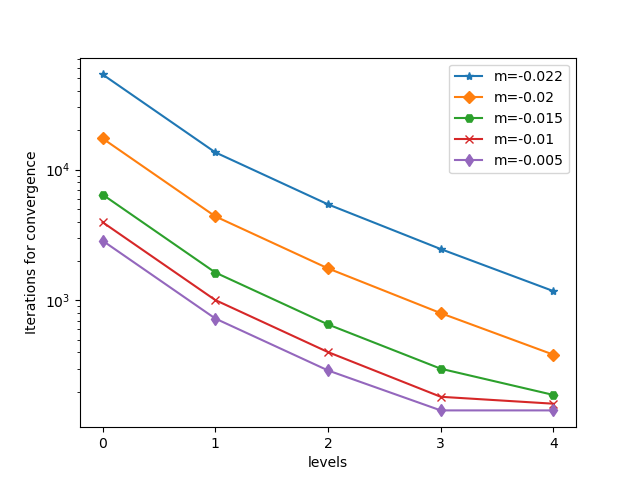

In [6]:
mlist=np.unique(df2.m.values)
# print(mlist)

plt.figure()

for i,marker in zip(mlist,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.m==i][['levels','conv_iters']]
    # display(df)
    plt.plot(df.levels.values,df.conv_iters.values*3,label="m="+str(i),marker=marker)


plt.xticks(df.levels.values)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('levels')
plt.ylabel('Iterations for convergence')
plt.legend()
plt.show()

## Plotting the Iterations for convergence vs mass square for runs with different MG levels

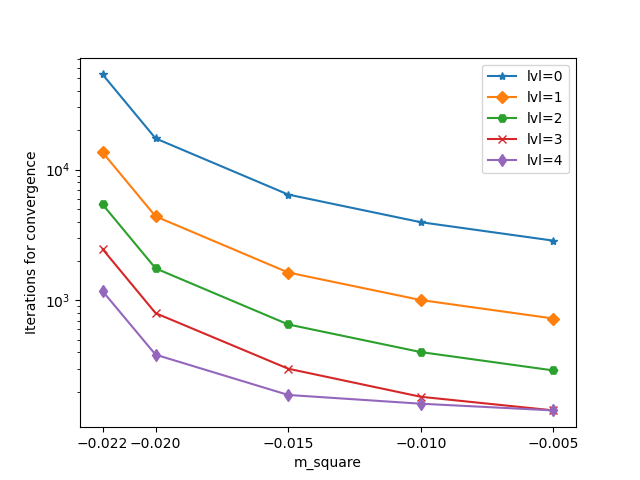

In [7]:
levels_list=np.unique(df2.levels.values)
# print(levels_list)

plt.figure()

for i,marker in zip(levels_list,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.levels==i][['m','conv_iters']]
    # display(df)
    plt.plot(df.m.values,df.conv_iters.values*3,label="lvl="+str(i),marker=marker)


plt.xticks(df.m.values)
plt.yscale('log')
plt.xlabel('m_square')
plt.ylabel('Iterations for convergence')
plt.legend()
plt.show()